In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from scipy.special import gamma
from typing import ClassVar, Mapping

from ape import accounts, chain, Contract, networks, project

In [6]:
# SEE: https://gist.github.com/banteg/dcf6082ff7fc6ad51ce220146f29d9ff
networks.parse_network_choice('ethereum:mainnet:alchemy').__enter__()

<alchemy chain_id=1>

In [7]:
tick_widths = list(range(120, 480, 60))
tick_widths

[120, 180, 240, 300, 360, 420]

In [12]:
# USDC/WETH 5bps pool, 8h candle backtests from block 16219692 to 16270092 (1 week)
FILEPATHS = [
    f"results/UniswapV3LPFixedWidthRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_{tick_width}_50400_backtest_16219692_16270092_2400.csv"
    for tick_width in tick_widths
]

In [15]:
runs = [pd.read_csv(fp) for fp in FILEPATHS]

In [18]:
df_tw120 = runs[0]
df_tw120

,number,values0,values1,values2,values3,sqrtPriceX96,tick,liquidity,position_token_id,position_liquidity,position_tick_lower,position_tick_upper,position_amount0,position_amount1
0,16219693,352377751,333180523635596387,0,5075828994937,2302457180693885351454651093163492,205553,31203981017892687890,1,3623179504766042,205490,205610,370059748,323033941474716914
1,16222093,0,631623701632844639,309577,416879322769163,2318747899162385489001287554456344,205694,17540821031132433136,1,3623179504766042,205490,205610,370059748,323033941474716914
2,16224493,748137905,0,1539342,1137266736986487,2280425969616657314568929983238151,205361,30523448134936311091,1,3623179504766042,205490,205610,370059748,323033941474716914
3,16226893,748137905,0,1539342,1137266736986487,2266012770497242894086255374140612,205234,20905059435363221456,1,3623179504766042,205490,205610,370059748,323033941474716914
4,16229293,748137905,0,1539342,1137266736986487,2270435262486917424056195007509857,205273,22227312718227892744,1,3623179504766042,205490,205610,370059748,323033941474716914
5,16231693,748137905,0,1539342,1137266736986487,2275703596294866001551435142483199,205319,22737464002634911280,1,3623179504766042,205490,205610,370059748,323033941474716914
6,16234093,748137905,0,1539342,1137266736986487,2272920569657780836424575412085603,205295,46555465465107464655,1,3623179504766042,205490,205610,370059748,323033941474716914
7,16236493,748137905,0,1539342,1137266736986487,2275732877226366029629403759490668,205319,29001499457139979699,1,3623179504766042,205490,205610,370059748,323033941474716914
8,16238893,748137905,0,1539342,1137266736986487,2274740167921692629443616837354464,205311,31485966568595190915,1,3623179504766042,205490,205610,370059748,323033941474716914
9,16241293,451302329,249700280855300498,2192730,1812827704123000,2300631716006577619818717260285935,205537,22618611010766339865,1,3623179504766042,205490,205610,370059748,323033941474716914


<Axes: xlabel='number'>

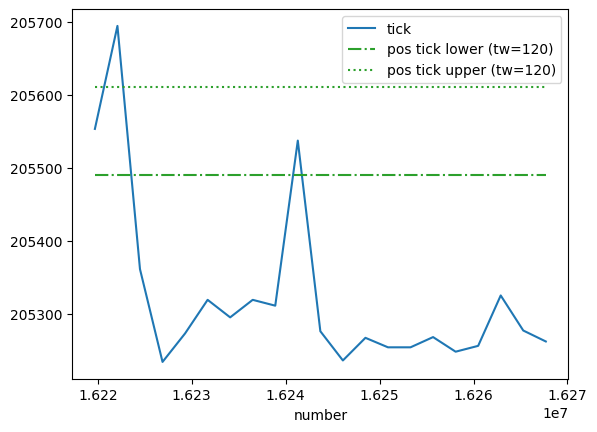

In [71]:
ax = df_tw120.plot(x='number', y='tick')
df_tw120.plot(x='number', y='position_tick_lower', color='C2', linestyle='dashdot', ax=ax, label='pos tick lower (tw=120)')
df_tw120.plot(x='number', y='position_tick_upper', color='C2', linestyle='dotted', ax=ax, label='pos tick upper (tw=120)')

<Axes: xlabel='number'>

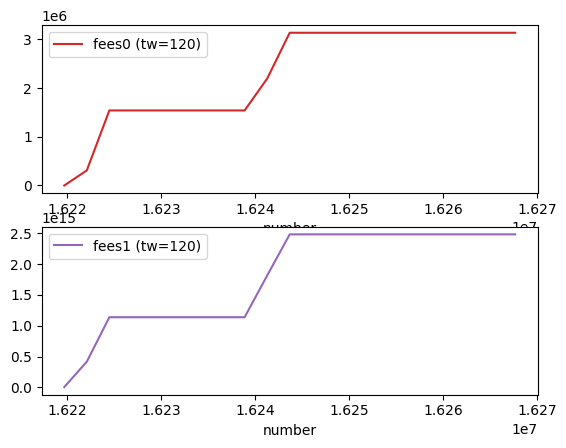

In [58]:
fig, ax = plt.subplots(2, 1)

df_tw120.plot(x='number', y='values2', color='C3', label='fees0 (tw=120)', ax=ax[0])
df_tw120.plot(x='number', y='values3', color='C4', label='fees1 (tw=120)', ax=ax[1])

In [45]:
# calc yield on original amounts
df_tw120['yield0'] = df_tw120['values2'] / df_tw120['position_amount0']
df_tw120['yield1'] = df_tw120['values3'] / df_tw120['position_amount1']

In [46]:
df_tw120

,number,values0,values1,values2,values3,sqrtPriceX96,tick,liquidity,position_token_id,position_liquidity,position_tick_lower,position_tick_upper,position_amount0,position_amount1,yield0,yield1
0,16219693,352377751,333180523635596387,0,5075828994937,2302457180693885351454651093163492,205553,31203981017892687890,1,3623179504766042,205490,205610,370059748,323033941474716914,0.000000,0.000016
1,16222093,0,631623701632844639,309577,416879322769163,2318747899162385489001287554456344,205694,17540821031132433136,1,3623179504766042,205490,205610,370059748,323033941474716914,0.000837,0.001291
2,16224493,748137905,0,1539342,1137266736986487,2280425969616657314568929983238151,205361,30523448134936311091,1,3623179504766042,205490,205610,370059748,323033941474716914,0.004160,0.003521
3,16226893,748137905,0,1539342,1137266736986487,2266012770497242894086255374140612,205234,20905059435363221456,1,3623179504766042,205490,205610,370059748,323033941474716914,0.004160,0.003521
4,16229293,748137905,0,1539342,1137266736986487,2270435262486917424056195007509857,205273,22227312718227892744,1,3623179504766042,205490,205610,370059748,323033941474716914,0.004160,0.003521
5,16231693,748137905,0,1539342,1137266736986487,2275703596294866001551435142483199,205319,22737464002634911280,1,3623179504766042,205490,205610,370059748,323033941474716914,0.004160,0.003521
6,16234093,748137905,0,1539342,1137266736986487,2272920569657780836424575412085603,205295,46555465465107464655,1,3623179504766042,205490,205610,370059748,323033941474716914,0.004160,0.003521
7,16236493,748137905,0,1539342,1137266736986487,2275732877226366029629403759490668,205319,29001499457139979699,1,3623179504766042,205490,205610,370059748,323033941474716914,0.004160,0.003521
8,16238893,748137905,0,1539342,1137266736986487,2274740167921692629443616837354464,205311,31485966568595190915,1,3623179504766042,205490,205610,370059748,323033941474716914,0.004160,0.003521
9,16241293,451302329,249700280855300498,2192730,1812827704123000,2300631716006577619818717260285935,205537,22618611010766339865,1,3623179504766042,205490,205610,370059748,323033941474716914,0.005925,0.005612


<Axes: xlabel='number'>

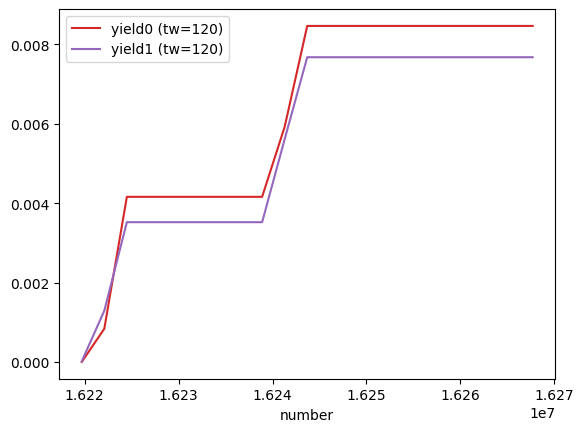

In [60]:
ax = df_tw120.plot(x='number', y='yield0', label='yield0 (tw=120)', color='C3')
df_tw120.plot(x='number', y='yield1', label='yield1 (tw=120)', color='C4', ax=ax)

### Plot across tick widths

In [74]:
# calc yield first
for i in range(len(runs)):
    runs[i]['yield0'] = runs[i]['values2'] / runs[i]['position_amount0']
    runs[i]['yield1'] = runs[i]['values3'] / runs[i]['position_amount1']

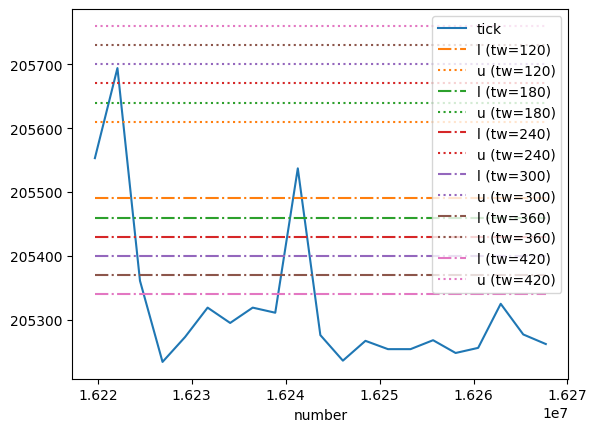

In [93]:
ax = runs[0].plot(x='number', y='tick')
for i in range(len(runs)):
    runs[i].plot(x='number', y='position_tick_lower', color=f'C{i+1}', linestyle='dashdot', ax=ax, label=f'l (tw={tick_widths[i]})')
    runs[i].plot(x='number', y='position_tick_upper', color=f'C{i+1}', linestyle='dotted', ax=ax, label=f'u (tw={tick_widths[i]})')

ax.legend(loc='upper right')

fig = ax.get_figure()
fig.savefig('./assets/backtest/ticks_UniswapV3LPFixedWidthRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_50400_backtest_16219692_16270092_2400.png')

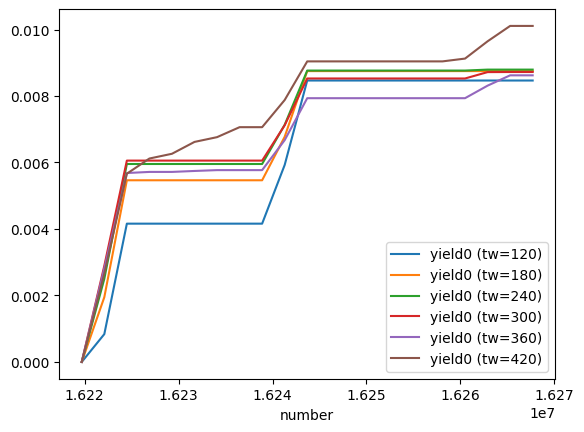

In [94]:
ax = runs[0].plot(x='number', y='yield0', label=f'yield0 (tw={tick_widths[0]})')
for i in range(1, len(runs)):
    runs[i].plot(x='number', y='yield0', ax=ax, label=f'yield0 (tw={tick_widths[i]})')

fig = ax.get_figure()
fig.savefig('./assets/backtest/yield0_UniswapV3LPFixedWidthRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_50400_backtest_16219692_16270092_2400.png')

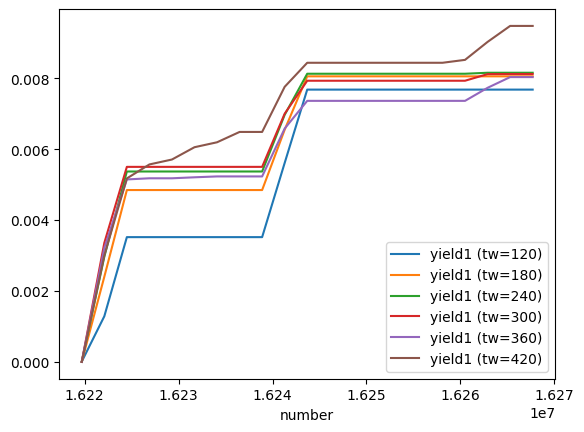

In [96]:
ax = runs[0].plot(x='number', y='yield1', label=f'yield1 (tw={tick_widths[0]})')
for i in range(1, len(runs)):
    runs[i].plot(x='number', y='yield1', ax=ax, label=f'yield1 (tw={tick_widths[i]})')

fig = ax.get_figure()
fig.savefig('./assets/backtest/yield1_UniswapV3LPFixedWidthRunner_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_50400_backtest_16219692_16270092_2400.png')